# Energy Dataset

## Importing Dataset

Importing the dataset from the Github repository of the project

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://github.com/up841068/energy-economic-growth/raw/main/raw_data/renewable-energy-data-scrapping.csv'

df_energy = pd.read_csv(url)

In [3]:
df_energy.head(3)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
pd.read_csv('owid-energy-data.csv').head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtering the rows and columns

Selecting the columns that contain information about renewable energy production 

In [4]:
columns_to_keep = ['country', 'year', 'iso_code', 'biofuel_electricity', 'hydro_electricity', 'other_renewable_exc_biofuel_electricity', 'solar_electricity', 'wind_electricity']
columns_to_drop = list(set(df_energy.columns) - set(columns_to_keep))
df_energy_filtered1 = df_energy.drop(columns=columns_to_drop)

In [5]:
df_energy_filtered1.head(3)

,country,year,iso_code,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity
0,Afghanistan,1900,AFG,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,NaN,NaN,NaN,NaN,NaN


## Cleaning rows from years previous to 2000

In [6]:
df_energy_filtered2 = df_energy_filtered1[df_energy_filtered1.year > 1999].reset_index()

In [7]:
df_energy_filtered2.shape

(6457, 9)

## Cleaning rows related to regions (not countries)

Removing the data points related to regions, as we intend to do the analysis on countries

In [8]:
# All countries have a respective 'iso_code', so we will remove the ones that do note have one
df_energy_filtered_countries_only = df_energy_filtered2.dropna(subset=['iso_code'])

In [9]:
df_energy_filtered_countries_only.shape

(4814, 9)

## Creating column with total production of energy

We are not using this at first!!! (This was supposed to be used if we had a lot of zeros/NaNs using the sources sepparated)

In [10]:
# df_energy_filtered_countries_only.loc[:, 'total_renewable_electricity'] = df_energy_filtered_countries_only[['biofuel_electricity', 'hydro_electricity', 'other_renewable_exc_biofuel_electricity', 'solar_electricity', 'wind_electricity']].sum(axis=1)

In [11]:
# df_energy_filtered_countries_only.head()

In [12]:
# count_sum_equals_zero = (df_energy_filtered_countries_only.total_renewable_electricity == 0).sum()/len(df_energy_filtered)
# count_sum_equals_zero

## Analyzing missing values

How many NaNs we have for each feature?

In [13]:
df_energy_filtered_countries_only.isnull().sum()/len(df_energy_filtered_countries_only)

index                                      0.000000
country                                    0.000000
year                                       0.000000
iso_code                                   0.000000
biofuel_electricity                        0.047570
hydro_electricity                          0.029290
other_renewable_exc_biofuel_electricity    0.052971
solar_electricity                          0.027005
wind_electricity                           0.029082
dtype: float64

In [14]:
## creates a dictionary with all features and the respective amount of Zeros for each
# countries = df_energy_filtered.country.unique()
# missing_values_dict = {}
# for country in countries:
#     percentage_missing_values = ((df_energy_filtered.country == country) & (df_energy_filtered.total_renewable_electricity == 0)).sum()\
#     /len(df_energy_filtered[df_energy_filtered.country == country])
#     missing_values_dict[country] = percentage_missing_values
# missing_values_dict

# Economic Growth Dataset

## Importing Dataset

Importing the dataset from the Github repository of the project

In [15]:
url = 'https://github.com/up841068/energy-economic-growth/raw/main/raw_data/World_Development_Indicators.xlsx'

df_gdp = pd.read_excel(url)

In [16]:
df_gdp.head(3)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],...,1969 [YR1969],1968 [YR1968],1967 [YR1967],1966 [YR1966],1965 [YR1965],1964 [YR1964],1963 [YR1963],1962 [YR1962],1961 [YR1961],1960 [YR1960]
0,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Brazil,BRA,6086.08487,6745.865881,9216.14336,9183.470768,8783.225984,8426.853352,...,3304.860245,3095.225632,2892.687723,2850.904774,2746.261344,2758.866607,2746.517052,2811.630814,2717.004894,2578.432125
1,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Afghanistan,AFG,..,..,608.386715,602.516979,592.476537,590.427739,...,..,..,..,..,..,..,..,..,..,..
2,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Albania,ALB,1606.296047,1960.881946,3780.698202,3855.759734,3952.802538,4090.371657,...,..,..,..,..,..,..,..,..,..,..


## Filtering the rows and columns

In [17]:
df_gdp_filtered = df_gdp.drop(columns=['Series Name', 'Series Code'])

In [18]:
df_gdp_filtered.shape

(266, 65)

## Flattening the years to be in one column (instead of one column per year)

Moving the year columns to become lines respective to their country.<br>
We will use this to merge with the Energy dataset

In [19]:
df_gdp_filtered_flattened = pd.melt(df_gdp_filtered, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP_per_capita')

In [20]:
df_gdp_filtered_flattened.head(3)

,Country Name,Country Code,Year,GDP_per_capita
0,Brazil,BRA,1990 [YR1990],6086.08487
1,Afghanistan,AFG,1990 [YR1990],..
2,Albania,ALB,1990 [YR1990],1606.296047


## Turning 'Year' column into an int

Removing the brackets string in the Year column and turning it into an integer

In [21]:
df_gdp_filtered_flattened['Year'] = df_gdp_filtered_flattened['Year'].str.extract(r'(\d{4})').astype(int)

In [22]:
df_gdp_filtered_flattened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    16758 non-null  object
 1   Country Code    16758 non-null  object
 2   Year            16758 non-null  int64 
 3   GDP_per_capita  16758 non-null  object
dtypes: int64(1), object(3)
memory usage: 523.8+ KB


Renaming the columns so they match the ones in the Energy dataset, easing the merge

In [23]:
df_gdp_filtered_flattened.rename(columns={"Year": "year", "Country Code": "iso_code"}, inplace=True)

# Merging the features and target datasets

In [24]:
full_df = pd.merge(df_energy_filtered_countries_only, df_gdp_filtered_flattened, on=['year', 'iso_code'], how='left')

In [25]:
full_df.drop(columns=['index', 'Country Name'], inplace=True)

In [26]:
full_df.sample(8)

,country,year,iso_code,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity,GDP_per_capita
1008,Costa Rica,2018,CRI,0.04,8.26,0.97,0.06,1.80,12470.956721
4112,Sudan,2001,SDN,0.12,1.25,0.00,0.00,0.00,1973.775269
2203,Jamaica,2016,JAM,0.16,0.12,0.00,0.01,0.21,5132.22647
442,Benin,2003,BEN,0.00,0.00,0.00,0.00,0.00,925.849261
355,Barbados,2005,BRB,0.00,0.00,0.00,0.00,0.00,17382.772798
1126,Democratic Republic of Congo,2001,COD,0.00,5.91,0.00,0.00,0.00,322.930024
2485,Libya,2011,LBY,0.00,0.00,0.00,0.01,0.00,6734.273768
198,Aruba,2003,ABW,0.00,0.00,0.00,0.00,0.00,29093.578238


# Treating the raw dataset

## Removing the countries with 'NaN's in 'GDP_per_capita' (target)

In [27]:
# The countries we remove here do not affect our model
regions_to_remove = full_df['country'][full_df.GDP_per_capita.isna()].unique()
regions_to_remove

array(['Antarctica', 'Cook Islands', 'Falkland Islands', 'French Guiana',
       'Guadeloupe', 'Martinique', 'Montserrat', 'Netherlands Antilles',
       'Niue', 'Reunion', 'Saint Helena', 'Saint Pierre and Miquelon',
       'Taiwan', 'Western Sahara'], dtype=object)

In [28]:
full_df_gdpclean1 = full_df.dropna(subset=['GDP_per_capita']).reset_index(drop=True)
full_df_gdpclean1

,country,year,iso_code,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity,GDP_per_capita
0,Afghanistan,2000,AFG,0.00,0.31,0.0,0.00,0.0,..
1,Afghanistan,2001,AFG,0.00,0.50,0.0,0.00,0.0,..
2,Afghanistan,2002,AFG,0.00,0.56,0.0,0.00,0.0,359.766343
3,Afghanistan,2003,AFG,0.00,0.63,0.0,0.00,0.0,363.101481
4,Afghanistan,2004,AFG,0.00,0.56,0.0,0.00,0.0,354.033913
...,...,...,...,...,...,...,...,...,...
4505,Zimbabwe,2017,ZWE,0.32,3.97,0.0,0.01,0.0,1421.24077
4506,Zimbabwe,2018,ZWE,0.39,5.05,0.0,0.02,0.0,1462.59028
4507,Zimbabwe,2019,ZWE,0.38,4.17,0.0,0.03,0.0,1342.989587
4508,Zimbabwe,2020,ZWE,0.35,3.81,0.0,0.03,0.0,1213.117058


## Removing the countries with missing data in 'GDP_per_capita' (target)

Removing the countries that have more than 9 missing data in gdp

In [29]:
total_countries = full_df_gdpclean1['country'].unique()
no_gdp_countries = []

for i in total_countries:
    if full_df_gdpclean1['GDP_per_capita'][(full_df_gdpclean1.GDP_per_capita == '..') & (full_df_gdpclean1.country == i)].count() > 9:
        no_gdp_countries.append(i)

no_gdp_countries

['British Virgin Islands',
 'Djibouti',
 'Eritrea',
 'Faroe Islands',
 'Gibraltar',
 'New Caledonia',
 'North Korea',
 'Somalia',
 'Turks and Caicos Islands',
 'Venezuela']

In [30]:
full_df_gdpclean2 = full_df_gdpclean1[~full_df_gdpclean1['country'].isin(no_gdp_countries)].reset_index(drop=True)
full_df_gdpclean2

,country,year,iso_code,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity,GDP_per_capita
0,Afghanistan,2000,AFG,0.00,0.31,0.0,0.00,0.0,..
1,Afghanistan,2001,AFG,0.00,0.50,0.0,0.00,0.0,..
2,Afghanistan,2002,AFG,0.00,0.56,0.0,0.00,0.0,359.766343
3,Afghanistan,2003,AFG,0.00,0.63,0.0,0.00,0.0,363.101481
4,Afghanistan,2004,AFG,0.00,0.56,0.0,0.00,0.0,354.033913
...,...,...,...,...,...,...,...,...,...
4285,Zimbabwe,2017,ZWE,0.32,3.97,0.0,0.01,0.0,1421.24077
4286,Zimbabwe,2018,ZWE,0.39,5.05,0.0,0.02,0.0,1462.59028
4287,Zimbabwe,2019,ZWE,0.38,4.17,0.0,0.03,0.0,1342.989587
4288,Zimbabwe,2020,ZWE,0.35,3.81,0.0,0.03,0.0,1213.117058


## Input value in missing data in target column

Inputing in the countries that have less than 10 missing data in gdp

In [31]:
# All the indexes of rows that have missing data
nan_target_indexes = full_df_gdpclean2[full_df_gdpclean2['GDP_per_capita'] == '..'].index
nan_target_indexes

Index([   0,    1,   65,   66,  241,  396,  617,  750,  751,  752,  753,  754,
        755,  992, 1037, 1060, 1105, 1279, 1368, 1391, 1502, 1547, 1569, 1592,
       1593, 1790, 1923, 1968, 2122, 2189, 2300, 2323, 2478, 2714, 2715, 2716,
       2717, 2780, 2891, 2892, 3131, 3154, 3221, 3354, 3530, 3553, 3624, 3625,
       3626, 3627, 3628, 3629, 3652, 3741, 3785, 3982, 3983, 4114, 4115, 4135,
       4243, 4244, 4245],
      dtype='int64')

In [32]:
# Getting the parameters for calculating the average GDP to be inputed (MANUAL CALCULATION FOR THE 'get_parameters_input_gdp_mean' FUNCTION

# index = item.index[0]
# country = item.loc[index, 'country'] # Country of the input row
# year = item.loc[index, 'year'] # Year of the input row
# years = np.arange(year-5, year+6, 1) # Range of years used to calculate the mean
# years = np.delete(years, np.where(years == year))
# index, country, year, years

In [33]:
# Function for getting the parameters for calculating the average GDP to be inputed

def get_parameters_input_gdp_mean(nan_index):
    country = full_df_gdpclean2.loc[nan_index, 'country'] # Country of the input row
    year = full_df_gdpclean2.loc[nan_index, 'year'] # Year of the input row
    years = np.arange(year-6, year+7, 1) # Range of years used to calculate the mean
    years = np.delete(years, np.where(years == year))
    # index, country, year, years
    return country, years

In [34]:
# Function for calculating the mean value to be inputed

def calculate_input_gdp_mean(country, years):
    gdp_values = []
    for i in years:
        gdp = full_df_gdpclean2.loc[(full_df_gdpclean2['country'] == country) & (full_df_gdpclean2['year'] == i), 'GDP_per_capita']
        if not gdp.empty:
            gdp_value = pd.to_numeric(gdp.item(), errors='coerce')
            if type(gdp_value) == float:
                gdp_values.append(gdp_value)
                # print(gdp_values)
    
    input_gdp_mean = np.mean(gdp_values)
    # print(gdp_input)
    return input_gdp_mean

In [35]:
# Interating over the rows that have missing values in the target and inputing the calculated meand from +/- 6 years
for nan_target_indexe in nan_target_indexes:
    country, years = get_parameters_input_gdp_mean(nan_target_indexe)
    input_gdp_mean = calculate_input_gdp_mean(country, years)
    print(f'Inputed {round(input_gdp_mean)} GDP mean for {country} in {years[5] + 1}')
    full_df_gdpclean2.at[nan_target_indexe, 'GDP_per_capita'] = input_gdp_mean

Inputed 368 GDP mean for Afghanistan in 2000
Inputed 378 GDP mean for Afghanistan in 2001
Inputed 12943 GDP mean for American Samoa in 2000
Inputed 12958 GDP mean for American Samoa in 2001
Inputed 45228 GDP mean for Austria in 2022
Inputed 42023 GDP mean for Belgium in 2022
Inputed 7938 GDP mean for Bulgaria in 2022
Inputed 96180 GDP mean for Cayman Islands in 2000
Inputed 96232 GDP mean for Cayman Islands in 2001
Inputed 95211 GDP mean for Cayman Islands in 2002
Inputed 92416 GDP mean for Cayman Islands in 2003
Inputed 89837 GDP mean for Cayman Islands in 2004
Inputed 87930 GDP mean for Cayman Islands in 2005
Inputed 13533 GDP mean for Croatia in 2022
Inputed 26960 GDP mean for Cyprus in 2022
Inputed 19402 GDP mean for Czechia in 2022
Inputed 56386 GDP mean for Denmark in 2022
Inputed 19769 GDP mean for Estonia in 2022
Inputed 45361 GDP mean for Finland in 2022
Inputed 37583 GDP mean for France in 2022
Inputed 42485 GDP mean for Germany in 2022
Inputed 18382 GDP mean for Greece in 20

In [36]:
# Check if there are no more missing values in the target
check_nan_target_indexes = full_df_gdpclean2[full_df_gdpclean2['GDP_per_capita'] == '..'].index
if check_nan_target_indexes.empty == True:
    print('Inputing succeded!')

Inputing succeded!


In [37]:
full_df_gdpclean2

,country,year,iso_code,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity,GDP_per_capita
0,Afghanistan,2000,AFG,0.00,0.31,0.0,0.00,0.0,368.187174
1,Afghanistan,2001,AFG,0.00,0.50,0.0,0.00,0.0,378.391401
2,Afghanistan,2002,AFG,0.00,0.56,0.0,0.00,0.0,359.766343
3,Afghanistan,2003,AFG,0.00,0.63,0.0,0.00,0.0,363.101481
4,Afghanistan,2004,AFG,0.00,0.56,0.0,0.00,0.0,354.033913
...,...,...,...,...,...,...,...,...,...
4285,Zimbabwe,2017,ZWE,0.32,3.97,0.0,0.01,0.0,1421.24077
4286,Zimbabwe,2018,ZWE,0.39,5.05,0.0,0.02,0.0,1462.59028
4287,Zimbabwe,2019,ZWE,0.38,4.17,0.0,0.03,0.0,1342.989587
4288,Zimbabwe,2020,ZWE,0.35,3.81,0.0,0.03,0.0,1213.117058


At this point, we have the full dataset with with all target values filled

## Treating 'NaN's from the features

In [38]:
# Checking countries that have more than 20 NaN values in its features (>25%)

columns = ['biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity']
total_countries = full_df_gdpclean2['country'].unique()
no_energy_countries = []

for i in total_countries:
    mask = full_df_gdpclean2['country'] == i
    nan_sum = full_df_gdpclean2.loc[mask, columns].isna().sum().sum()
    if nan_sum > 20:
        no_energy_countries.append(i)
print(no_energy_countries)

['Bermuda', 'Chile', 'Micronesia (country)', 'Northern Mariana Islands', 'Tuvalu']


In [39]:
# Cropping countries that have more than 20 NaN values in its features (>25%)
full_df_gdp_feat_clean = full_df_gdpclean2[~full_df_gdpclean2['country'].isin(no_energy_countries)].reset_index(drop=True)
full_df_gdp_feat_clean

,country,year,iso_code,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity,GDP_per_capita
0,Afghanistan,2000,AFG,0.00,0.31,0.0,0.00,0.0,368.187174
1,Afghanistan,2001,AFG,0.00,0.50,0.0,0.00,0.0,378.391401
2,Afghanistan,2002,AFG,0.00,0.56,0.0,0.00,0.0,359.766343
3,Afghanistan,2003,AFG,0.00,0.63,0.0,0.00,0.0,363.101481
4,Afghanistan,2004,AFG,0.00,0.56,0.0,0.00,0.0,354.033913
...,...,...,...,...,...,...,...,...,...
4181,Zimbabwe,2017,ZWE,0.32,3.97,0.0,0.01,0.0,1421.24077
4182,Zimbabwe,2018,ZWE,0.39,5.05,0.0,0.02,0.0,1462.59028
4183,Zimbabwe,2019,ZWE,0.38,4.17,0.0,0.03,0.0,1342.989587
4184,Zimbabwe,2020,ZWE,0.35,3.81,0.0,0.03,0.0,1213.117058


In [40]:
# Filling remaining NaN values that were supposed to be zero (values from 2021 with all historical values equals to zero)
full_df_gdp_feat_clean['biofuel_electricity'] = full_df_gdp_feat_clean['biofuel_electricity'].fillna(0)
full_df_gdp_feat_clean['hydro_electricity'] = full_df_gdp_feat_clean['hydro_electricity'].fillna(0)

In [41]:
full_df_gdp_feat_clean.isnull().sum()

country                                      0
year                                         0
iso_code                                     0
biofuel_electricity                          0
hydro_electricity                            0
other_renewable_exc_biofuel_electricity    155
solar_electricity                            0
wind_electricity                             0
GDP_per_capita                               0
dtype: int64

In [42]:
(full_df_gdp_feat_clean == 0).sum()/len(full_df_gdp_feat_clean)

country                                    0.000000
year                                       0.000000
iso_code                                   0.000000
biofuel_electricity                        0.489011
hydro_electricity                          0.248447
other_renewable_exc_biofuel_electricity    0.849976
solar_electricity                          0.621596
wind_electricity                           0.645007
GDP_per_capita                             0.000000
dtype: float64

In [43]:
# full_df.to_csv('/home/pedroabisamara/code/final_project/cleaned_dataset.csv')

# Creating two versions of the treated dataset

Creates the version that will keep Zero values (*base*), and the one that will have 0.0001 inplace of Zero values (*final*)

In [44]:
full_cleaned_df_base = full_df_gdp_feat_clean
full_cleaned_df_final = full_df_gdp_feat_clean

# Pre-processing the features

## Splitting the *base* dataset into training and testing

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Creates X and y for base dataset
X_base = full_cleaned_df_base[['biofuel_electricity', 
                               'hydro_electricity', 
                               'other_renewable_exc_biofuel_electricity', 
                               'solar_electricity', 
                               'wind_electricity']]
y_base = full_cleaned_df_base['GDP_per_capita']

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df_bra = full_cleaned_df_base[full_cleaned_df_base.country== 'Brazil']

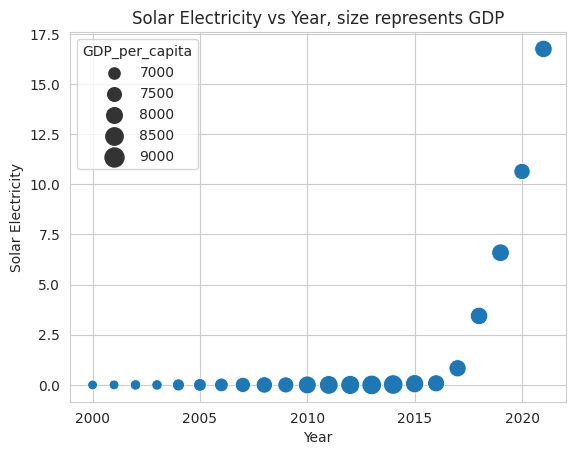

In [49]:
# Set the plot style
sns.set_style('whitegrid')

# Plot the data using sns.scatterplot()
sns.scatterplot(x='year', y='solar_electricity', data=df_bra, size='GDP_per_capita', sizes=(50, 200))

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Solar Electricity')
plt.title('Solar Electricity vs Year, size represents GDP')

# Display the plot
plt.show()

In [50]:
df_bra

,country,year,iso_code,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity,GDP_per_capita
529,Brazil,2000,BRA,7.41,301.36,0.0,0.00,0.00,6745.865881
530,Brazil,2001,BRA,8.47,265.20,0.0,0.00,0.04,6749.889719
531,Brazil,2002,BRA,9.66,283.23,0.0,0.00,0.06,6868.704165
532,Brazil,2003,BRA,11.26,302.56,0.0,0.00,0.06,6865.181505
533,Brazil,2004,BRA,11.78,317.59,0.0,0.00,0.06,7178.356116
534,Brazil,2005,BRA,12.79,334.08,0.0,0.00,0.09,7325.912358
535,Brazil,2006,BRA,13.99,345.32,0.0,0.00,0.24,7534.551559
536,Brazil,2007,BRA,16.97,370.27,0.0,0.00,0.64,7909.834758
537,Brazil,2008,BRA,18.91,365.86,0.0,0.00,0.84,8231.110269
538,Brazil,2009,BRA,21.81,387.08,0.0,0.00,1.24,8142.770839


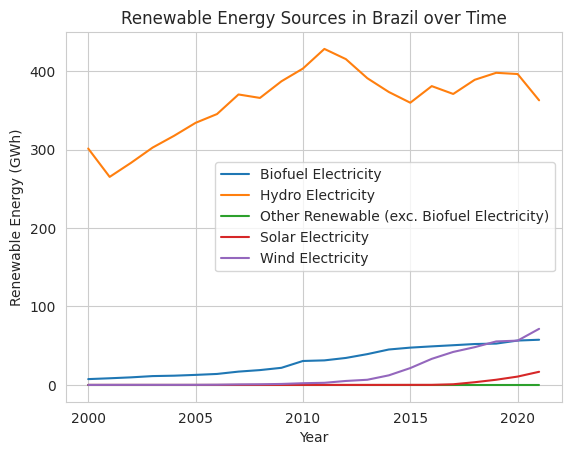

In [51]:
# Set the plot style
sns.set_style('whitegrid')

# Plot the data using sns.lineplot()
sns.lineplot(x='year', y='biofuel_electricity', data=df_bra, label='Biofuel Electricity')
sns.lineplot(x='year', y='hydro_electricity', data=df_bra, label='Hydro Electricity')
sns.lineplot(x='year', y='other_renewable_exc_biofuel_electricity', data=df_bra, label='Other Renewable (exc. Biofuel Electricity)')
sns.lineplot(x='year', y='solar_electricity', data=df_bra, label='Solar Electricity')
sns.lineplot(x='year', y='wind_electricity', data=df_bra, label='Wind Electricity')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Renewable Energy (GWh)')
plt.title('Renewable Energy Sources in Brazil over Time')

# Display the plot
plt.show()

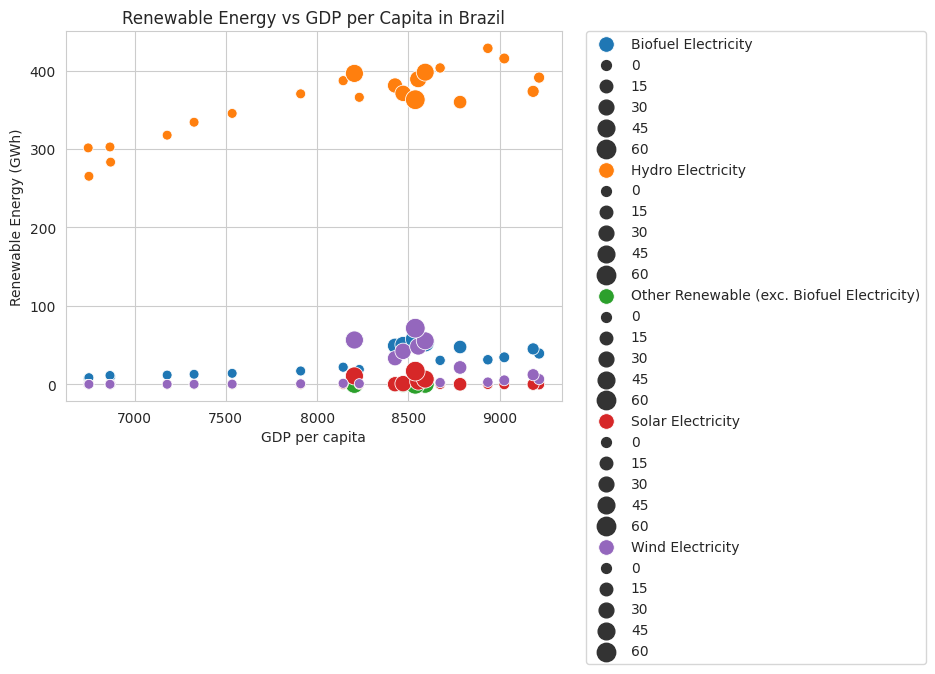

In [52]:

# Set the plot style
sns.set_style('whitegrid')

# Plot the data using sns.scatterplot()
sns.scatterplot(x='GDP_per_capita', y='biofuel_electricity', data=df_bra, label='Biofuel Electricity', size='wind_electricity', sizes=(50, 200))
sns.scatterplot(x='GDP_per_capita', y='hydro_electricity', data=df_bra, label='Hydro Electricity', size='wind_electricity', sizes=(50, 200))
sns.scatterplot(x='GDP_per_capita', y='other_renewable_exc_biofuel_electricity', data=df_bra, label='Other Renewable (exc. Biofuel Electricity)', size='wind_electricity', sizes=(50, 200))
sns.scatterplot(x='GDP_per_capita', y='solar_electricity', data=df_bra, label='Solar Electricity', size='wind_electricity', sizes=(50, 200))
sns.scatterplot(x='GDP_per_capita', y='wind_electricity', data=df_bra, label='Wind Electricity', size='wind_electricity', sizes=(50, 200))

# Add axis labels and title
plt.xlabel('GDP per capita')
plt.ylabel('Renewable Energy (GWh)')
plt.title('Renewable Energy vs GDP per Capita in Brazil')

# Move the legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Display the plot
plt.show()

In [53]:
df = full_cleaned_df_base

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  4186 non-null   object 
 1   year                                     4186 non-null   int64  
 2   iso_code                                 4186 non-null   object 
 3   biofuel_electricity                      4186 non-null   float64
 4   hydro_electricity                        4186 non-null   float64
 5   other_renewable_exc_biofuel_electricity  4031 non-null   float64
 6   solar_electricity                        4186 non-null   float64
 7   wind_electricity                         4186 non-null   float64
 8   GDP_per_capita                           4186 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 294.5+ KB


In [55]:
df.describe()

,year,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity
count,4186.000000,4186.000000,4186.000000,4031.000000,4186.000000,4186.000000
mean,2010.602962,1.888937,17.566040,0.389576,1.171022,3.165978
std,6.384235,7.857764,76.139855,1.885791,10.128379,22.487304
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,2011.000000,0.010000,0.915000,0.000000,0.000000,0.000000
75%,2016.000000,0.360000,7.207500,0.000000,0.020000,0.100000
max,2022.000000,169.930000,1321.710000,19.160000,327.000000,655.600000


In [56]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Grenada', 

In [57]:
sns.lineplot(x='GDP_per_capita', y=, data=df)

SyntaxError: invalid syntax (514483252.py, line 1)

In [ ]:
df

In [ ]:
# Filter data for Brazil only
df_brazil = df[df['country'] == 'Brazil']

# Create a line plot of renewable energy production over time
plt.plot(df_brazil['year'], df_brazil['biofuel_electricity'], label='Biofuel Electricity')
plt.plot(df_brazil['year'], df_brazil['hydro_electricity'], label='Hydro Electricity')
plt.plot(df_brazil['year'], df_brazil['other_renewable_exc_biofuel_electricity'], label='Other Renewable (exc. Biofuel Electricity)')
plt.plot(df_brazil['year'], df_brazil['solar_electricity'], label='Solar Electricity')
plt.plot(df_brazil['year'], df_brazil['wind_electricity'], label='Wind Electricity')
plt.plot(df_brazil['year'], df_brazil['GDP_per_capita'], label='GDP per capita')

# Set axis labels and legend
plt.xlabel('Year')
plt.ylabel('Renewable Energy Production (GWh) / GDP per capita')
plt.legend()

# Show the plot
plt.show()

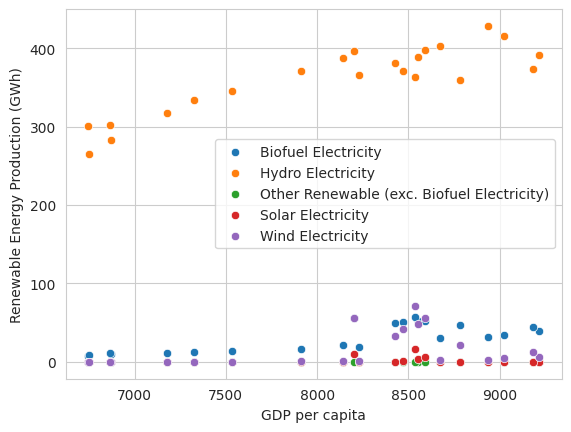

In [60]:
# Filter data for Brazil only
df_brazil = df[df['country'] == 'Brazil']

# Create a scatter plot of renewable energy production vs. GDP per capita
sns.scatterplot(x='GDP_per_capita', y='biofuel_electricity', data=df_brazil, label='Biofuel Electricity')
sns.scatterplot(x='GDP_per_capita', y='hydro_electricity', data=df_brazil, label='Hydro Electricity')
sns.scatterplot(x='GDP_per_capita', y='other_renewable_exc_biofuel_electricity', data=df_brazil, label='Other Renewable (exc. Biofuel Electricity)')
sns.scatterplot(x='GDP_per_capita', y='solar_electricity', data=df_brazil, label='Solar Electricity')
sns.scatterplot(x='GDP_per_capita', y='wind_electricity', data=df_brazil, label='Wind Electricity')

# Set axis labels and legend
plt.xlabel('GDP per capita')
plt.ylabel('Renewable Energy Production (GWh)')
plt.legend()

# Show the plot
plt.show()

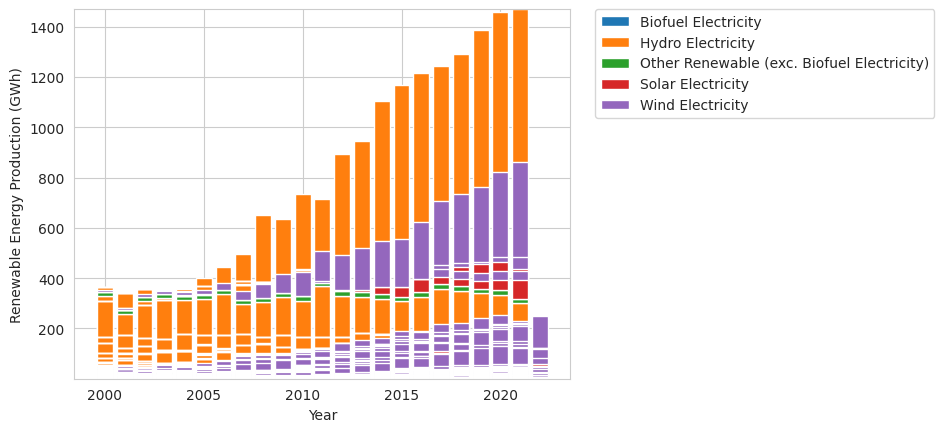

In [62]:
# Create a stacked bar chart of renewable energy production by type
plt.bar(df['year'], df['biofuel_electricity'], label='Biofuel Electricity')
plt.bar(df['year'], df['hydro_electricity'], bottom=df['biofuel_electricity'], label='Hydro Electricity')
plt.bar(df['year'], df['other_renewable_exc_biofuel_electricity'], bottom=df['biofuel_electricity'] + df['hydro_electricity'], label='Other Renewable (exc. Biofuel Electricity)')
plt.bar(df['year'], df['solar_electricity'], bottom=df['biofuel_electricity'] + df['hydro_electricity'] + df['other_renewable_exc_biofuel_electricity'], label='Solar Electricity')
plt.bar(df['year'], df['wind_electricity'], bottom=df['biofuel_electricity'] + df['hydro_electricity'] + df['other_renewable_exc_biofuel_electricity'] + df['solar_electricity'], label='Wind Electricity')

# Set axis labels and legend
plt.xlabel('Year')
plt.ylabel('Renewable Energy Production (GWh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

In [123]:
df.columns

Index(['country', 'year', 'iso_code', 'biofuel_electricity',
       'hydro_electricity', 'other_renewable_exc_biofuel_electricity',
       'solar_electricity', 'wind_electricity', 'GDP_per_capita'],
      dtype='object')

In [121]:
df_bra

,country,year,iso_code,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity,GDP_per_capita
529,Brazil,2000,BRA,7.41,301.36,0.0001,0.0001,0.0001,6745.865881
530,Brazil,2001,BRA,8.47,265.20,0.0001,0.0001,0.0400,6749.889719
531,Brazil,2002,BRA,9.66,283.23,0.0001,0.0001,0.0600,6868.704165
532,Brazil,2003,BRA,11.26,302.56,0.0001,0.0001,0.0600,6865.181505
533,Brazil,2004,BRA,11.78,317.59,0.0001,0.0001,0.0600,7178.356116
534,Brazil,2005,BRA,12.79,334.08,0.0001,0.0001,0.0900,7325.912358
535,Brazil,2006,BRA,13.99,345.32,0.0001,0.0001,0.2400,7534.551559
536,Brazil,2007,BRA,16.97,370.27,0.0001,0.0001,0.6400,7909.834758
537,Brazil,2008,BRA,18.91,365.86,0.0001,0.0001,0.8400,8231.110269
538,Brazil,2009,BRA,21.81,387.08,0.0001,0.0001,1.2400,8142.770839


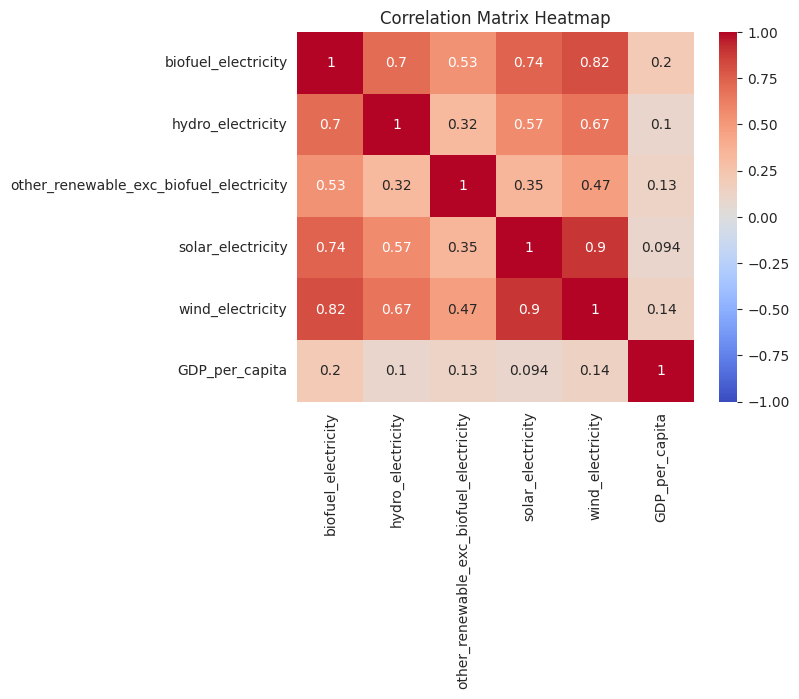

In [133]:
corr_coeffs = df[['biofuel_electricity',
       'hydro_electricity', 'other_renewable_exc_biofuel_electricity',
       'solar_electricity', 'wind_electricity', 'GDP_per_capita']].corr()



# Print the correlation coefficients in descending order
sns.heatmap(corr_coeffs, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [51]:
# Split base X and y into training and testing datasets
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, test_size=0.2, random_state=0)

## Scaling *base* dataset

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
# Step 0 - Instanciate Standard Scaler
mm_scaler_base = MinMaxScaler()

# Step 1- Fit the scaler to the features
mm_scaler_base.fit(X_base_train)

# 2-Scale/Transform; <-> apply the transformation and store it in a df
X_base_train_scaled = pd.DataFrame(mm_scaler_base.transform(X_base_train), columns=X_base_train.columns)

In [57]:
X_base_train_scaled.head(3)

,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity
0,0.000353,0.035083,0.000000,0.000000,0.000000
1,0.000706,0.003026,0.267223,0.000306,0.002303
2,0.005414,0.007225,0.000000,0.000000,0.001113


## In *final* dataset, replacing Zeros in features, by 0.0001

In [58]:
# Checking the minimum value of energy prduction we currently have
min_value = full_cleaned_df_final[['biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity']][full_cleaned_df_base[['biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity']] != 0].min().min()

In [59]:
min_value

0.006

In [60]:
# Replacing Zeros by 0.0001
full_cleaned_df_final[['biofuel_electricity', 'hydro_electricity', 'other_renewable_exc_biofuel_electricity', 'solar_electricity', 'wind_electricity']] = full_cleaned_df_final[['biofuel_electricity', 'hydro_electricity', 'other_renewable_exc_biofuel_electricity', 'solar_electricity', 'wind_electricity']].replace(0, 0.0001)

In [61]:
(full_cleaned_df_final == 0).sum()

country                                    0
year                                       0
iso_code                                   0
biofuel_electricity                        0
hydro_electricity                          0
other_renewable_exc_biofuel_electricity    0
solar_electricity                          0
wind_electricity                           0
GDP_per_capita                             0
dtype: int64

## Splitting the *final* dataset into training and testing

In [62]:
# Creates X and y for final dataset
X_final = full_cleaned_df_final[['biofuel_electricity', 'hydro_electricity', 'other_renewable_exc_biofuel_electricity', 'solar_electricity', 'wind_electricity']]
y_final = full_cleaned_df_final['GDP_per_capita']

In [63]:
# Split final X and y into training and testing datasets
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state=0)

## Scaling *final* dataset

In [64]:
# Step 0 - Instanciate Standard Scaler
mm_scaler_final = MinMaxScaler()

# Step 1- Fit the scaler to the features
mm_scaler_final.fit(X_base_train)

# 2-Scale/Transform; <-> apply the transformation and store it in a df
X_final_train_scaled = pd.DataFrame(mm_scaler_final.transform(X_final_train), columns=X_final_train.columns)

In [65]:
X_final_train_scaled.head(3)

,biofuel_electricity,hydro_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity
0,0.000353,0.035083,0.000005,3.058104e-07,1.525320e-07
1,0.000706,0.003026,0.267223,3.058104e-04,2.303234e-03
2,0.005414,0.007225,0.000005,3.058104e-07,1.113484e-03
